[git](https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=dcce7f91a1563ac6565e0d9c7b35684beca7a81f&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f796475616e3030342f636f6d6d756e69636174652d646174612d6c6f616e2d646174612d66726f6d2d50726f737065722f646363653766393161313536336163363536356530643963376233353638346265636137613831662f6578706c6f726174696f6e2e6970796e62&logged_in=false&nwo=yduan004%2Fcommunicate-data-loan-data-from-Prosper&path=exploration.ipynb&platform=android&repository_id=193989262&repository_type=Repository&version=98)

[VIZs](https://trenton3983.github.io/files/UDACITY_R_Data_Analysis_Project.nb.html#proportion_delinquent)

#### Dataset: 
Loan Data from Prosper


#### Overview and Notes
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

This data dictionary explains the variables in the data set. You are not expected to explore all of the variables in the dataset! 
* Focus your exploration on about 10-15 of them.

#### Example Topics/Questions
* What factors affect a loan’s outcome status?
* What affects the borrower’s APR or interest rate?
* Are there differences between loans depending on how large the original loan amount was?

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
# Show all contencts of each row and column, to enable us read the data disctionary to chose relevant variables
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Importing the loan data
# loan_data = pd.read_csv('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv')
# load_data.to_csv('loan_data.csv')
loan_original = pd.read_csv('loan_data.csv')

# loan_data.dropna(inplace=True)

In [48]:
# loan_original['ListingCategory (numeric)'].value_counts()
# loan_data['EmploymentStatus'].value_counts()
loan_data.isnull().sum()

LoanNumber                       0
ListingCreationDate              0
ListingCategory (numeric)        0
LoanStatus                       0
BorrowerAPR                     25
EmploymentStatus              2255
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
IncomeRange                      0
IncomeVerifiable                 0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
Term                             0
MonthlyLoanPayment               0
InvestmentFromFriendsCount       0
Recommendations                  0
Investors                        0
dtype: int64

In [4]:
# Getting information on the loan data
loan_original.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [48]:
# pd.to_datetime(df2['week']).dt.month_name()
# loan_data['ListingCreationDateYear'] = loan_data['ListingCreationDate']
# loan_data['ListingCreationDateYear'] = pd.to_datetime(loan_data['ListingCreationDateYear'], format='%Y%m%d')
# loan_data['ListingCreationDateYear'] = pd.to_datetime(loan_data['ListingCreationDateYear']).dt.to_period('Y')
# loan_data['ListingCreationDateYear'].value_counts()

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Freq: A-DEC, Name: ListingCreationDateYear, dtype: int64

In [58]:
data_dict.Variable.values

array(['ListingKey', 'ListingNumber', 'ListingCreationDate',
       'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months',
       'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent',
       'DelinquenciesLast7Years', 'PublicRecordsLast10Years',
       'PublicRecordsLast12Months', 'RevolvingCreditBalance',
       'BankcardUtilization', 'Available

In [4]:
# Importing the data dictionary
data_dict = pd.read_csv('Prosper_Loan_Data_Dictionary.csv')

In [5]:
# Identifying Chosen variables for analysis
colums = ['LoanNumber', 'ListingCreationDate','ListingCategory (numeric)', 
          'LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
          'CreditScoreRangeLower', 'CreditScoreRangeUpper','IncomeRange', 'IncomeVerifiable',
          'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate','Term',
          'MonthlyLoanPayment','InvestmentFromFriendsCount', 'Recommendations', 'Investors', 'ClosedDate']

# Identifying Chosen variables for analysis for our data dictionary
columd = ['LoanNumber', 'ListingCreationDate','ListingCategory', 
          'LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
          'CreditScoreRangeLower', 'CreditScoreRangeUpper','IncomeRange', 'IncomeVerifiable',
          'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate','Term',
          'MonthlyLoanPayment','InvestmentFromFriendsCount', 'Recommendations', 'Investors', 'ClosedDate']
# There is slight difference in the two columns: while listing category in columns is followed by numeric, 
# the one used for our dictionary isn't followed by (numeric)

In [6]:
# Updating data dictionary
new_dict = data_dict[data_dict['Variable'].isin(columd)]
new_dict = new_dict.reset_index(drop=True)

In [7]:
# Creating dataframe with our chosen attributes
loan_data = loan_original[colums]

# Re-odering the loan data to conform with the way attributtes are listed
loan_data = loan_data.reindex(columns = colums)

In [32]:
loan_data.InvestmentFromFriendsCount.value_counts()

0     111806
1       1835
2        215
3         40
4         15
5          8
9          5
6          4
8          3
7          2
33         1
20         1
15         1
13         1
Name: InvestmentFromFriendsCount, dtype: int64

In [29]:
# Getting statistics of lower and uper credit score of applicants
loan_data[['CreditScoreRangeLower','CreditScoreRangeUpper']].describe()

,CreditScoreRangeLower,CreditScoreRangeUpper
count,113346.000000,113346.000000
mean,685.567731,704.567731
std,66.458275,66.458275
min,0.000000,19.000000
25%,660.000000,679.000000
50%,680.000000,699.000000
75%,720.000000,739.000000
max,880.000000,899.000000


In [27]:
new_dict

,Variable,Description
0,ListingCreationDate,The date the listing was created.
1,Term,The length of the loan expressed in months.
2,LoanStatus,"The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket."
3,ClosedDate,"Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses."
4,BorrowerAPR,The Borrower's Annual Percentage Rate (APR) for the loan.
5,ListingCategory,"The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans"
6,EmploymentStatus,The employment status of the borrower at the time they posted the listing.
7,EmploymentStatusDuration,The length in months of the employment status at the time the listing was created.
8,IsBorrowerHomeowner,A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
9,CreditScoreRangeLower,The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.


<AxesSubplot:>

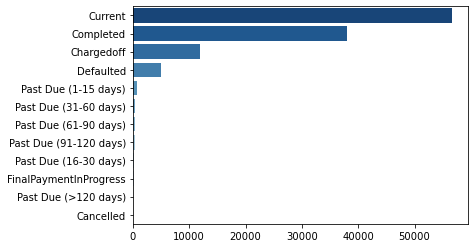

In [9]:
sb.barplot(data=loan_data, y=(loan_data.LoanStatus.value_counts().index), x=(loan_data.LoanStatus.value_counts().values), palette = 'Blues_r')